In [1]:
import SimpleITK as sitk
import numpy as np
from pathlib import Path
import nibabel as nib
import os
from dipy.align.imaffine import AffineMap
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import SimpleITK as sitk
from pathlib import Path
import numpy as np

/Users/naimsassine/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
lesions_table = pd.read_csv('E:/Memoire/ProstateX/Masks/Files/lesions/PROSTATEx_Classes.csv')
x = lesions_table.iloc[92]
x["ID"][-1]

'2'

In [35]:
for i in x : 
    if x[i] == True : 
        print("lol")
    else : 
        print("sdff")

lol
sdff


In [17]:
mask = np.load('E:/Memoire/ProstateX/generated/mutli_class_segm/train_masks_not_cropped_in_one/0001.npy')
np.unique(mask)

array([0, 1, 2])

In [18]:
t2_train_table = pd.read_csv('E:/Memoire/ProstateX/generated/train/dataframes/training_meta_data.csv')
t2_case = t2_train_table.iloc[1]
t2_case_image = sitk.ReadImage(str(t2_case['resampled_nifti']))
t2_array = sitk.GetArrayViewFromImage(t2_case_image)
t2_case

Unnamed: 0                                                         1
ProxID                                                ProstateX-0001
DCMSerDescr                                               t2_tse_tra
resampled_nifti    E:/Memoire/ProstateX/generated/tra...
sequence_type                                                     t2
fid                                                                1
pos                (-40.5367071921656, 29.320722668457, -16.70766...
ijk                                                   (157, 186, 10)
zone                                                              AS
ClinSig                                                        False
Name: 1, dtype: object

In [19]:
mask = np.where(mask==2, 1, mask)

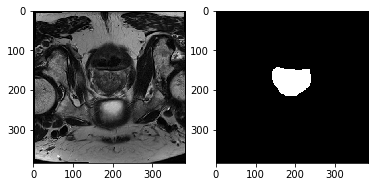

In [20]:
z = 10
plt.figure()
plt.subplot(1,2,1)
plt.imshow(t2_array[z, :, :], 'gray', interpolation='none')

plt.subplot(1,2,2)
plt.imshow(t2_array[z, :, :], 'gray', interpolation='none')
plt.imshow(mask[z, :, :], 'gray', interpolation='none', alpha=1)

plt.show()

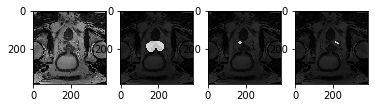

In [104]:
# comparer aux initiaux
pros_mask = np.load('E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/Prostate_Masks/ProstateX-0002.nii.gz.npy')
lesion_mask = np.load('E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/T2_Lesions_Masks/ProstateX-0002-Finding1-t2_tse_tra_ROI.nii.gz.npy')

lesion_mask2 = np.load('E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/T2_Lesions_Masks/ProstateX-0002-Finding2-t2_tse_tra_ROI.nii.gz.npy')
z = 11
plt.figure()
plt.subplot(1,4,1)
plt.imshow(t2_array[z, :, :], 'gray', interpolation='none')

plt.subplot(1,4,2)
plt.imshow(t2_array[z, :, :], 'gray', interpolation='none')
plt.imshow(pros_mask[z, :, :], 'gray', interpolation='none', alpha=0.7)


plt.subplot(1,4,3)
plt.imshow(t2_array[z, :, :], 'gray', interpolation='none')
plt.imshow(lesion_mask[z, :, :], 'gray', interpolation='none', alpha=0.7)

plt.subplot(1,4,4)
plt.imshow(t2_array[z, :, :], 'gray', interpolation='none')
plt.imshow(lesion_mask2[z, :, :], 'gray', interpolation='none', alpha=0.7)

plt.show()

In [15]:
mask = np.load('E:/Memoire/ProstateX/generated/mutli_class_segm/train_masks_cropped_in_one/0125.npy')
images = np.load('E:/Memoire/ProstateX/generated/mutli_class_segm/train_images_cropped/0125.npy')

In [16]:
print(mask.shape)
print(images.shape)

(21, 128, 128)
(21, 128, 128, 3)


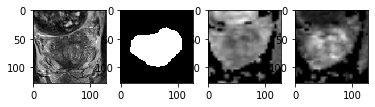

In [29]:
z = 15
plt.figure()
plt.subplot(1,4,1)
plt.imshow(images[z, :, :, 0], 'gray', interpolation='none')

plt.subplot(1,4,2)
plt.imshow(images[z, :, :, 0], 'gray', interpolation='none')
plt.imshow(mask[z, :, :], 'gray', interpolation='none', alpha=1)

plt.subplot(1,4,3)
plt.imshow(images[z, :, :, 1], 'gray', interpolation='none')

plt.subplot(1,4,4)
plt.imshow(images[z, :, :, 2], 'gray', interpolation='none')

plt.show()

In [10]:
images = np.load('E:/Memoire/ProstateX/generated/mutli_class_segm/train_images_not_cropped/ProstateX-0126.npy')
images[1, :, :, 0].shape

(384, 384)

In [174]:
file_path = "E:/Memoire/ProstateX/generated/mutli_class_segm/train_masks_not_cropped_in_one/0125.npy"
str(file_path).split("/")[-1][0:4]

'0125'

In [182]:
# do it on training images
mask = np.load('E:/Memoire/ProstateX/generated/mutli_class_segm/train_masks_not_cropped_in_one/0002.npy')
mask[1].shape

(384, 384)

In [3]:
images = np.load('E:/Memoire/ProstateX/generated/mutli_class_segm/train_images_cropped/0015.npy')
images2 = np.load('E:/Memoire/ProstateX/generated/mutli_class_segm/train_images_cropped/0016.npy')

In [24]:
print(images.shape)
print(images2.shape)

(19, 128, 128, 4)
(21, 128, 128, 4)


In [20]:
images_sum = np.concatenate((images, images2), 0)

In [26]:
images_sum[0].shape

(128, 128, 4)

In [35]:
list_of_images = [images] + [images2]
lol = np.concatenate(list_of_images, 0)

In [36]:
lol.shape

(40, 128, 128, 4)

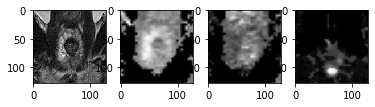

In [32]:
z = 21
plt.figure()
plt.subplot(1,4,1)
plt.imshow(images_sum[z][:, :, 0], 'gray', interpolation='none')

plt.subplot(1,4,2)
plt.imshow(images_sum[z][:, :, 1], 'gray', interpolation='none')

plt.subplot(1,4,3)
plt.imshow(images_sum[z][:, :, 2], 'gray', interpolation='none')

plt.subplot(1,4,4)
plt.imshow(images_sum[z][:, :, 3], 'gray', interpolation='none')

plt.show()

In [52]:
# test if its all good

In [2]:
images = np.load('E:/Memoire/ProstateX/generated/mutli_class_segm/train_images_concatenated/train_images_concatenated.npy')
masks = np.load('E:/Memoire/ProstateX/generated/mutli_class_segm/train_masks_concatenated/train_masks_concatenated.npy')

In [3]:
print(images.shape)
print(masks.shape)

(1279, 128, 128, 3)
(1279, 128, 128)


In [40]:
def detect_lesions_in_volume(volume):
    slices = [] 
    for i in range(volume.shape[0]):
        if len(np.unique(volume[i])) > 2 : 
            slices.append(i)
    return slices

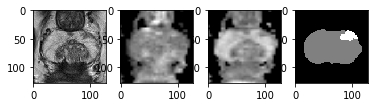

In [23]:
z = 12
plt.figure()
plt.subplot(1,4,1)
plt.imshow(images[z, :, :, 0], 'gray', interpolation='none')

plt.subplot(1,4,4)
plt.imshow(masks[z, :, :], 'gray', interpolation='none')

plt.subplot(1,4,3)
plt.imshow(images[z, :, :, 1], 'gray', interpolation='none')

plt.subplot(1,4,2)
plt.imshow(images[z, :, :, 2], 'gray', interpolation='none')

plt.show()

In [22]:
images[z, :, :, 0] = images[z, :, :, 0] + masks[z, :, :] + masks[z, :, :] + masks[z, :, :] + masks[z, :, :] + masks[z, :, :] + masks[z, :, :]

In [6]:
images = np.load('E:/Memoire/ProstateX/generated/mutli_class_segm/train_images_concatenated/train_images_concatenated.npy')
masks = np.load('E:/Memoire/ProstateX/generated/mutli_class_segm/train_masks_concatenated/train_masks_concatenated.npy')

In [7]:
masks.shape

(1034, 128, 128)

In [5]:
# let's have a 200 of each image
num0 = 0
num01 = 0
num012 = 0
num0123 = 0
for i in range(images.shape[0]):
    unique_val_pix = np.unique(masks[i])
    if len(unique_val_pix) == 1 :
        num0 += 1
        if num0 > 200 : 
            images = np.delete(images, i, 0)
            masks = np.delete(masks, i, 0)
    elif len(unique_val_pix) == 2 :
        num01 += 1
        if num01 > 200 : 
            images = np.delete(images, i, 0)
            masks = np.delete(masks, i, 0)
    elif len(unique_val_pix) == 3 :
        num012 += 1
        if num012 > 200 : 
            images = np.delete(images, i, 0)
            masks = np.delete(masks, i, 0)
    elif len(unique_val_pix) == 4 :
        num0123 += 1
        if num0123 > 200 : 
            images = np.delete(images, i, 0)
            masks = np.delete(masks, i, 0)


np.save('E:/Memoire/ProstateX/generated/mutli_class_segm/train_images_concatenated/train_images_concatenated.npy', images)
np.save('E:/Memoire/ProstateX/generated/mutli_class_segm/train_masks_concatenated/train_masks_concatenated.npy', masks)

IndexError: index 807 is out of bounds for axis 0 with size 807

In [4]:
print(num0)
print(num01)
print(num012)
print(num0123)

NameError: name 'num0' is not defined

In [75]:
images_lol = np.load('E:/Memoire/ProstateX/generated/mutli_class_segm/train_images_cropped/0015.npy')

In [94]:
images_lol = np.delete(images_lol, 0, 0)

In [95]:
images_lol.shape

(12, 128, 128, 4)

In [4]:
string = 'E:/Memoire/ProstateX/generated/mutli_class_segm/train_masks_cropped_in_one/0000.npy'
string.split("/")[8][:4]

'0000'

In [44]:
a = np.array([0, 3, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 3, 4])
unique, counts = np.unique(a, return_counts=True)

In [45]:
results = []

In [50]:
results = results + [counts]

In [51]:
results

[array([7, 4, 1, 2, 1]), array([7, 4, 1, 2, 1]), array([7, 4, 1, 2, 1])]

In [42]:
unique, lol = np.unique(a, return_counts=True)

In [53]:
np.concatenate(results)

array([7, 4, 1, 2, 1, 7, 4, 1, 2, 1, 7, 4, 1, 2, 1])

In [56]:
a = np.array([])

In [66]:
a = np.divide(a, 5)

In [67]:
a

array([0.8, 1. ])

In [4]:
images = np.load('E:/Memoire/ProstateX/generated/mutli_class_segm/train_images_concatenated/4Dtrain_images_concatenated.npy')
masks = np.load('E:/Memoire/ProstateX/generated/mutli_class_segm/train_masks_concatenated/train_masks_concatenated.npy')

In [5]:
print(images.shape)
print(masks.shape)

(1279, 128, 128, 4)
(1279, 128, 128)


In [15]:
masks = masks - 1
pros_masks = np.where(masks==-1, 0, masks)

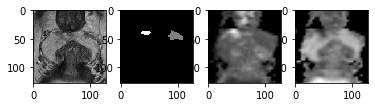

In [16]:
z = 13
plt.figure()
plt.subplot(1,4,1)
plt.imshow(images[z, :, :, 0], 'gray', interpolation='none')

plt.subplot(1,4,4)
plt.imshow(images[z, :, :, 1], 'gray', interpolation='none')

plt.subplot(1,4,3)
plt.imshow(images[z, :, :, 2], 'gray', interpolation='none')

plt.subplot(1,4,2)
plt.imshow(pros_masks[z, :, :], 'gray', interpolation='none')

plt.show()

In [60]:
# transform the masks in only the prostate
pros_masks = np.where(masks==2, 1, masks)
pros_masks = np.where(pros_masks==3, 1, pros_masks)

In [61]:
masks_reshaped = np.expand_dims(pros_masks, axis=3)

In [62]:
result = np.append(images, masks_reshaped, axis=-1)

In [63]:
result.shape

(1279, 128, 128, 4)

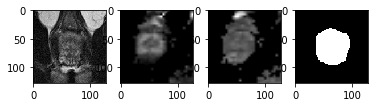

In [64]:
z = 226
plt.figure()
plt.subplot(1,4,1)
plt.imshow(result[z, :, :, 0], 'gray', interpolation='none')

plt.subplot(1,4,4)
plt.imshow(result[z, :, :, 3], 'gray', interpolation='none')

plt.subplot(1,4,3)
plt.imshow(result[z, :, :, 1], 'gray', interpolation='none')

plt.subplot(1,4,2)
plt.imshow(result[z, :, :, 2], 'gray', interpolation='none')

plt.show()

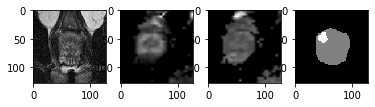

In [65]:
plt.figure()
plt.subplot(1,4,1)
plt.imshow(images[z, :, :, 0], 'gray', interpolation='none')

plt.subplot(1,4,4)
plt.imshow(masks[z, :, :], 'gray', interpolation='none')

plt.subplot(1,4,3)
plt.imshow(images[z, :, :, 1], 'gray', interpolation='none')

plt.subplot(1,4,2)
plt.imshow(images[z, :, :, 2], 'gray', interpolation='none')

plt.show()